In [2]:
import sys
import os
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [3]:
# Download the spherical harmonic time-series output from the path model
import os.path
if not os.path.exists('Gauss_Bsurf.mat'): 
    !wget http://morpho.ipgp.fr/4DEarth/Gauss_Bsurf.mat

In [4]:
# import the (Matlab formatted) dataset
import h5py
filepath = 'Gauss_Bsurf.mat'
arrays = {}
f = h5py.File(filepath,'r')
for k, v in f.items():
    arrays[k] = np.array(v)

In [9]:
coeffs = arrays['gnm'][:,:].T
time = arrays['timers'].flatten()
print( 'Shape of coeffs array: ', coeffs.shape )
print ('Times (in years) of output', time )

Shape of coeffs array:  (50001, 960)
Times (in years) of output [ 4200.   4200.2  4200.4 ... 14199.6 14199.8 14200. ]


In [6]:
import chaosmagpy as cp


In [42]:
max_degree = 13

In [48]:
Gauss_dot = np.gradient(coeffs[:,:max_degree * (max_degree+2)],time,axis=0)
Gauss_dot2 = np.gradient(Gauss_dot,time,axis=0)

In [49]:
spec = np.zeros(Gauss_dot2.shape[0])
for i in range(Gauss_dot2.shape[0]):
    spec[i] = cp.model_utils.power_spectrum(Gauss_dot2[i,:],radius=3480).sum()
    

Text(0.5, 1.0, 'CMB SA energy')

<Figure size 432x288 with 0 Axes>

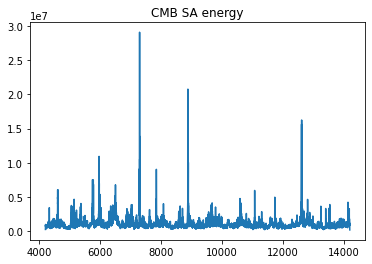

In [57]:
plt.figure()
fig,ax = plt.subplots(1) 
ax.plot(time,spec)
ax.set_title('CMB SA energy')


In [59]:
max_degree = 10
Gauss_dot10 = np.gradient(coeffs[:,:max_degree * (max_degree+2)],time,axis=0)
Gauss_dot2_10 = np.gradient(Gauss_dot10,time,axis=0)

spec10 = np.zeros(Gauss_dot2_10.shape[0])
for i in range(Gauss_dot2_10.shape[0]):
    spec10[i] = cp.model_utils.power_spectrum(Gauss_dot2_10[i,:],radius=3480).sum()

Text(0.5, 1.0, 'CMB SA energy, degree 10')

<Figure size 432x288 with 0 Axes>

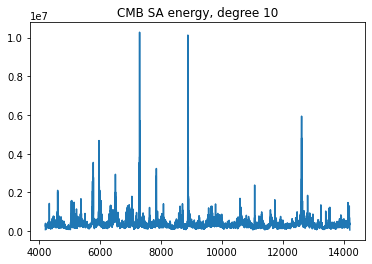

In [61]:
plt.figure()
fig,ax = plt.subplots(1) 
ax.plot(time,spec10)
ax.set_title('CMB SA energy, degree 10')


In [112]:
chaos711 = cp.CHAOS.from_mat(r'/Users/earpwl/OneDrive - University of Leeds/home/models/CHAOS-7/CHAOS-7.11.mat')


<Figure size 432x288 with 0 Axes>

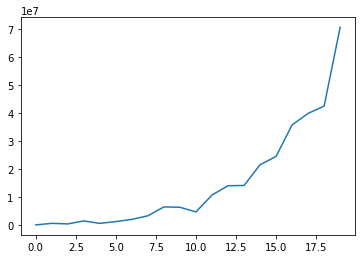

In [113]:
# check that the calculation of SA is correct, this matches with the describing paper.
time = cp.data_utils.mjd2000(2020)
coeffs_MF = chaos711.synth_coeffs_tdep(time, nmax=20, deriv=1)  # shape: (10, 195)

spec_chaos = cp.model_utils.power_spectrum(coeffs_MF,radius=3480)
plt.figure()
fig,ax = plt.subplots(1) 
ax.plot(spec_chaos)


In [115]:
print('Model timespan is:', cp.data_utils.mjd_to_dyear(chaos711.model_tdep.breaks[[0, -1]]))

# create vector of time points in modified Julian date from 2000 to 2020
time = np.linspace(cp.data_utils.mjd2000(2000, 1, 1),cp.data_utils.mjd2000(2020, 1, 1),20*5) 

# compute the Gauss coefficients of the MF, SV and SA of the internal field
#coeffs_MF = model.synth_coeffs_tdep(time, nmax=13, deriv=0)  # shape: (10, 195)
#coeffs_SV = model.synth_coeffs_tdep(time, nmax=14, deriv=1)  # shape: (10, 224)
coeffs_SA = chaos711.synth_coeffs_tdep(time, nmax=13, deriv=2)  # shape: (10, 99)

Model timespan is: [1997.1 2022.6]


In [116]:
spec_chaos = np.zeros(coeffs_SA.shape[0])
for i in range(coeffs_SA.shape[0]):
    spec_chaos[i] = cp.model_utils.power_spectrum(coeffs_SA[i,:],radius=3480).sum()

Text(0.5, 1.0, 'CMB SA energy, degree 13')

<Figure size 432x288 with 0 Axes>

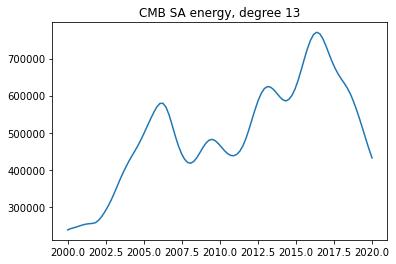

In [117]:
plt.figure()
fig,ax = plt.subplots(1) 
ax.plot(cp.data_utils.mjd_to_dyear(time),spec_chaos)
ax.set_title('CMB SA energy, degree 13')


In [ ]:
# Plot Model and Earth, side by side

<Figure size 936x288 with 0 Axes>

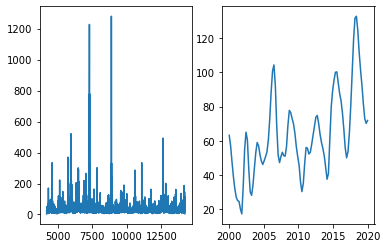

In [126]:
plt.figure(figsize=(13,4))
fig,(ax1,ax2) = plt.subplots(1,2) 

time_model = arrays['timers'].flatten()
spec = np.zeros(Gauss_dot2.shape[0])
for i in range(Gauss_dot2.shape[0]):
    spec[i] = cp.model_utils.power_spectrum(Gauss_dot2[i,:],radius=6371).sum()
ax1.plot(time_model,spec)

time_chaos = np.linspace(cp.data_utils.mjd2000(2000, 1, 1),cp.data_utils.mjd2000(2020, 1, 1),20*5) 
spec_chaos = np.zeros(coeffs_SA.shape[0])
for i in range(coeffs_SA.shape[0]):
    spec_chaos[i] = cp.model_utils.power_spectrum(coeffs_SA[i,:],radius=6371).sum()
ax2.plot(cp.data_utils.mjd_to_dyear(time_chaos),spec_chaos)
#fig.set_title('CMB SA energy, degree 10')


In [ ]:
## issue of timescale conversion between the model and Earth. What other choices are there, and do any result in a better match of SA?